In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
housing_data = pd.read_csv('/content/Boston_HousePrice_dataset.csv')
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing_data.shape

(506, 14)

In [4]:
housing_data = housing_data.rename(columns={'MEDV': 'PRICE'})
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# check for missing values
housing_data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [6]:
# statistical measures of the dataset
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


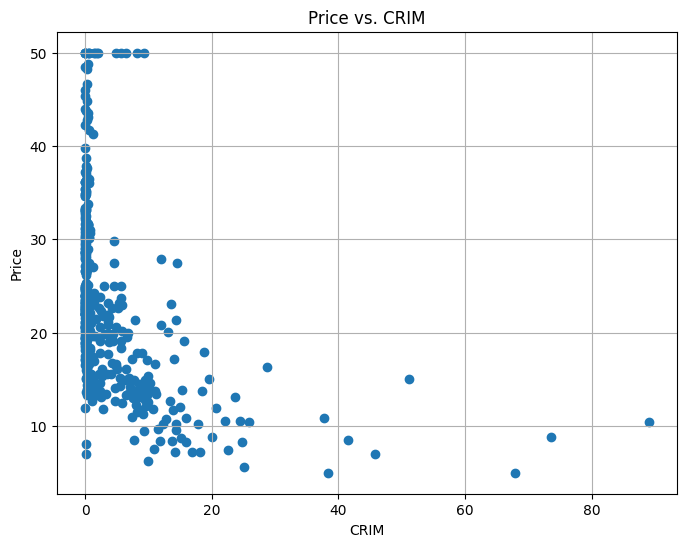

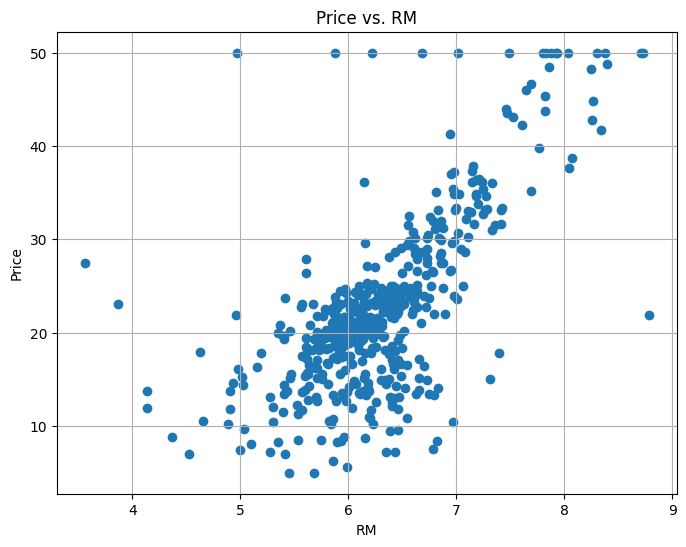

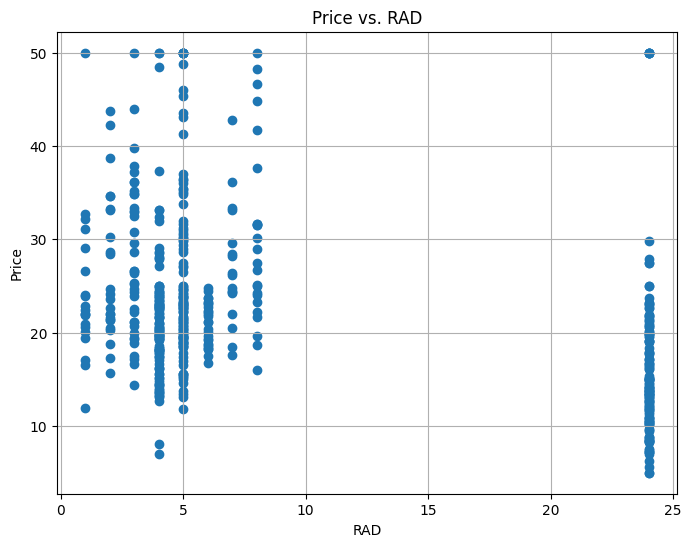

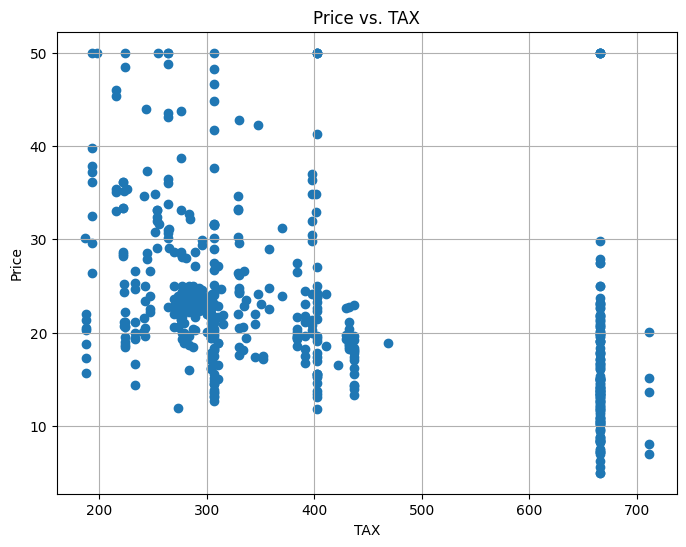

In [7]:
columns_to_plot = ['CRIM', 'RM', 'RAD', 'TAX']

for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.scatter(housing_data[col], housing_data['PRICE'])
    plt.title(f'Price vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

In [8]:
correlation = housing_data.corr()

<Axes: >

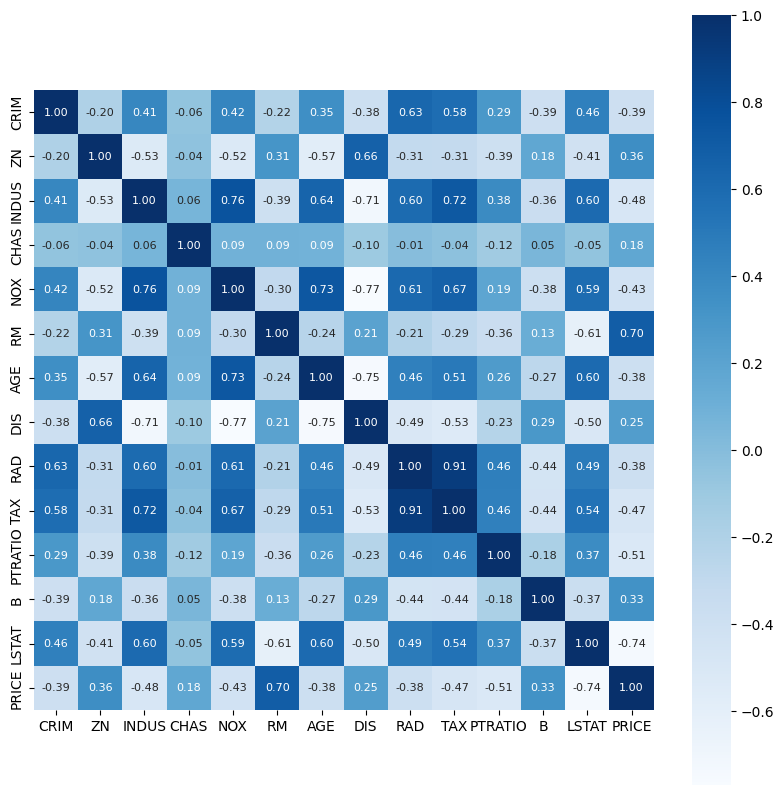

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [10]:
X = housing_data.drop(['PRICE'], axis=1)
Y = housing_data['PRICE']

In [11]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [13]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(506, 13) (404, 13) (102, 13)
(506,) (404,) (102,)


In [14]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [15]:
lr = LinearRegression()
xgb = XGBRegressor()
rf = RandomForestRegressor()

In [16]:
algo=[lr, xgb, rf]
algo_name=['Linear Regression', 'XGBoost Regressor', 'RandomForest Regressor']

Linear Regression 

R_squared_train:  0.7508856358979673 

MSE_train:  21.641412753226312 



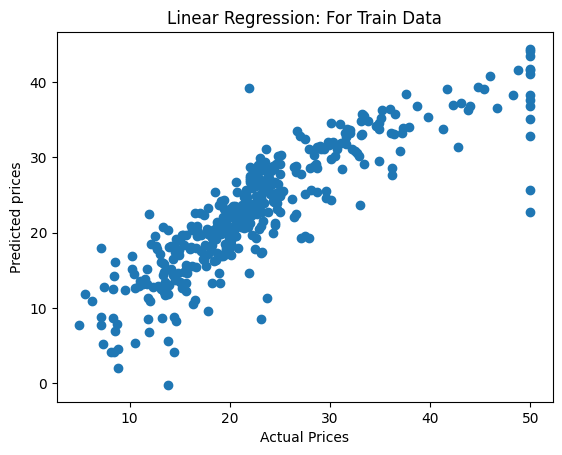


R_squared_test:  0.6687594935356326 

MSE_test:  24.291119474973478 



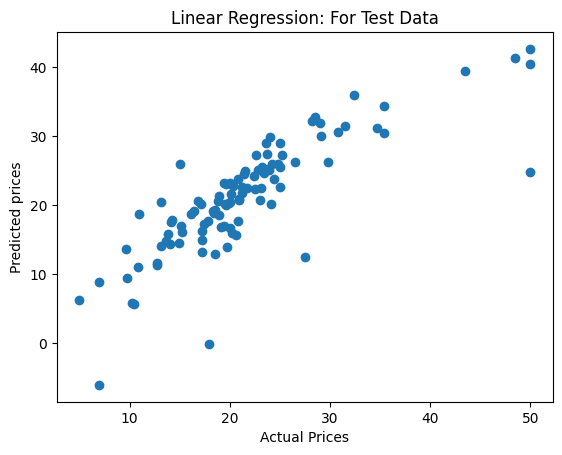


XGBoost Regressor 

R_squared_train:  0.9999969829984965 

MSE_train:  0.0002620971899759447 



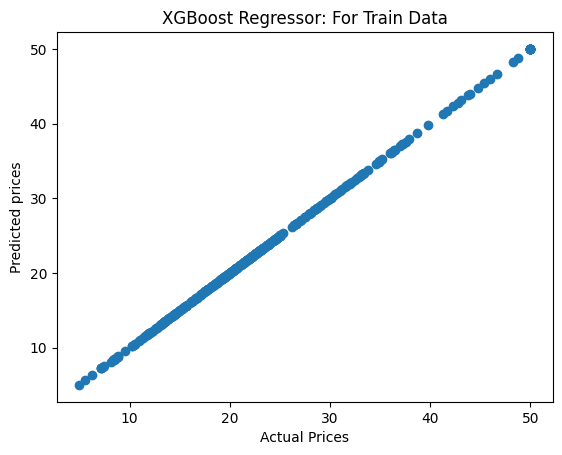


R_squared_test:  0.9057837838492537 

MSE_test:  6.909231565384943 



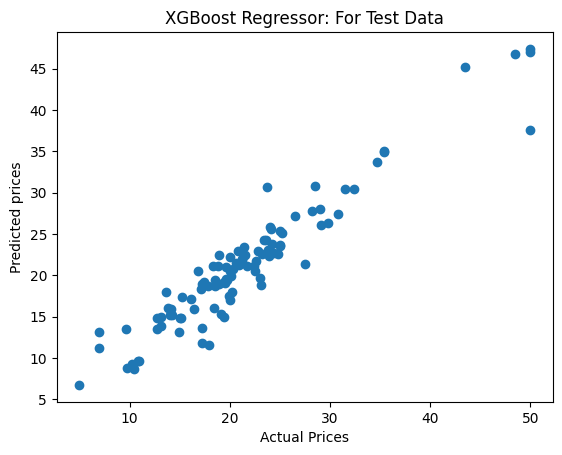


RandomForest Regressor 

R_squared_train:  0.9771092223619359 

MSE_train:  1.98859976980198 



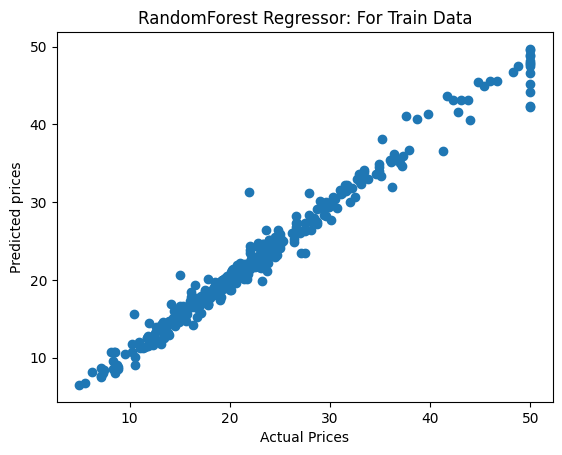


R_squared_test:  0.888641515560065 

MSE_test:  8.16633895098039 



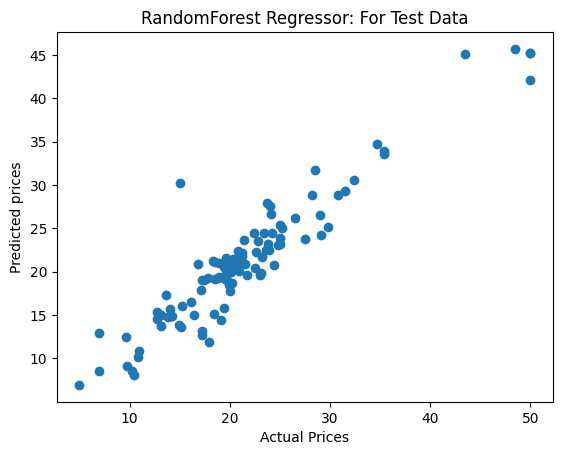

In [17]:
for i in range(len(algo)):
  algo[i].fit(X_train,Y_train)
  training_data_prediction = algo[i].predict(X_train)
  R_squared = metrics.r2_score(Y_train, training_data_prediction)
  MSE = metrics.mean_squared_error(Y_train, training_data_prediction)
  print(algo_name[i], '\n')
  print('R_squared_train: ', R_squared, '\n')
  print('MSE_train: ', MSE, '\n')
  plt.scatter(Y_train, training_data_prediction)
  plt.xlabel("Actual Prices")
  plt.ylabel("Predicted prices")
  plt.title(algo_name[i] + ": For Train Data")
  plt.show()
  testing_data_prediction = algo[i].predict(X_test)
  R_squared = metrics.r2_score(Y_test, testing_data_prediction)
  MSE = metrics.mean_squared_error(Y_test, testing_data_prediction)
  print()
  print('R_squared_test: ', R_squared, '\n')
  print('MSE_test: ', MSE, '\n')
  plt.scatter(Y_test, testing_data_prediction)
  plt.xlabel("Actual Prices")
  plt.ylabel("Predicted prices")
  plt.title(algo_name[i] + ": For Test Data")
  plt.show()
  print()